# Import dependencies 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import urllib
#geoplot
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
%matplotlib inline 

# Download and save data on disk

In [7]:
url ='https://covid19.who.int/WHO-COVID-19-global-data.csv'
file_path = os.path.join('data','covid')
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, 'WHO-COVID-19-global-data.csv')
urllib.request.urlretrieve(url, csv_path)

('data/covid/WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x7fc10918e750>)

# Data Preprocessing

Read data

In [8]:
#Read data from disk
df = pd.read_csv(csv_path)

Data formatting 

In [9]:
#Quick look at data format 
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [10]:
#Quick look at features
df.columns 

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [11]:
# There seem to be white space in some columns (all except first one) - let's get read of them
df.columns = [col.strip() for col in df.columns] #  list comprehension 
#df.columns 

Missing values

In [12]:
#Let us look if there are null vlaues in the dataset
df.isnull().sum()

Date_reported          0
Country_code         160
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [13]:
#Since 'Country_code' is not very importnat 
#for our analysis (we have country column already), we can drop the columns altogether 
df.drop('Country_code', axis=1, inplace=True)

Feature engineering

In [14]:
# We might find it useful to analyse monthly/yearly stats
#So let's format the date feature to allow for this 
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['month'] = df['Date_reported'].apply(lambda date:date.month)
df['year'] = df['Date_reported'].apply(lambda date:date.year)

In [15]:
#Check new features
df.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
0,2020-02-24,Afghanistan,EMRO,5,5,0,0,2,2020
1,2020-02-25,Afghanistan,EMRO,0,5,0,0,2,2020
2,2020-02-26,Afghanistan,EMRO,0,5,0,0,2,2020
3,2020-02-27,Afghanistan,EMRO,0,5,0,0,2,2020
4,2020-02-28,Afghanistan,EMRO,0,5,0,0,2,2020


# Exploratory data analysis 

Useful data subset

In [16]:
#Since we are interested in countries in the 'AFRO' region, lets just select that
df_africa = df[df.WHO_region == 'AFRO']
df_africa.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
344,2020-02-25,Algeria,AFRO,5,5,0,0,2,2020
345,2020-02-26,Algeria,AFRO,0,5,0,0,2,2020
346,2020-02-27,Algeria,AFRO,0,5,0,0,2,2020
347,2020-02-28,Algeria,AFRO,0,5,0,0,2,2020
348,2020-02-29,Algeria,AFRO,0,5,0,0,2,2020


In [17]:
#let us have a look at countries names for consistency 
df_africa.Country.unique()


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', 'Côte d’Ivoire',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

Popular stats

In [40]:
#'Côte d’Ivoire'. Let us replace it with English name for consistency 
df_africa.Country.replace(to_replace ="Côte d’Ivoire", 
                value ="Ivory Coast", inplace=True)
df_africa.Country.unique()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', 'Ivory Coast',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

Data visualization


In [ ]:
#Let's create some simple plots to check out the data!
# Spread over time
#Monthly analysis 
# Current data
# View oer country
# cases per day/month .. per country ...
# cumulated cases
# deaths
# Cumulated deaths
# where is the pick
# Countries worse affected
# Caveat , numbers not per capita (which is more appropriate)
# 



In [21]:
df_africa.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
344,2020-02-25,Algeria,AFRO,5,5,0,0,2,2020
345,2020-02-26,Algeria,AFRO,0,5,0,0,2,2020
346,2020-02-27,Algeria,AFRO,0,5,0,0,2,2020
347,2020-02-28,Algeria,AFRO,0,5,0,0,2,2020
348,2020-02-29,Algeria,AFRO,0,5,0,0,2,2020


# Some Visualization

In [ ]:
from datetime import datetime
datetime.today().utcnow().strftime('%d-%m-%Y')

In [23]:
#Let's get yesterday's data = => latest 
from datetime import date, timedelta
yesterday = (date.today() - timedelta(days=1)).strftime('%Y-%m-%d')
df_africa_latest = df_africa[(df.Date_reported == yesterday)]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Data Visualization on map

In [24]:
#map
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = df_africa_latest['Country'],
        locationmode = "country names",
        z =  df_africa_latest['Cumulative_cases'],
        text = 'Total Cases ',
        colorbar = {'title' : 'Total Cases'}
      ) 

In [25]:
layout = dict(
    title = 'Total Cases Africa',
    width = 900,
    height =  800,
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'},
        scope = "africa"
    )
)

In [26]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

# Countries with most cases

In [39]:
sorted = df_africa_latest.sort_values(by=['Cumulative_cases'], ascending=False)
top10 = sorted.head(10)
top10


,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
31103,2020-08-20,South Africa,AFRO,3916,596060,159,12423,8,2020
24164,2020-08-20,Nigeria,AFRO,593,50488,4,985,8,2020
12874,2020-08-20,Ghana,AFRO,101,43094,8,256,8,2020
521,2020-08-20,Algeria,AFRO,822,39847,23,1402,8,2020
10810,2020-08-20,Ethiopia,AFRO,1336,34058,28,600,8,2020
17956,2020-08-20,Kenya,AFRO,379,31015,19,506,8,2020
5979,2020-08-20,Cameroon,AFRO,138,18762,2,408,8,2020
7831,2020-08-20,Ivory Coast,AFRO,82,17232,1,111,8,2020
20031,2020-08-20,Madagascar,AFRO,65,14074,0,173,8,2020
29602,2020-08-20,Senegal,AFRO,141,12446,2,258,8,2020


# countries with least cases

In [28]:
bottom10 = sorted.tail(10)
bottom10

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
19055,2020-08-20,Lesotho,AFRO,50,996,0,30,8,2020
6663,2020-08-20,Chad,AFRO,1,971,0,76,8,2020
27460,2020-08-20,Réunion,AFRO,42,945,0,5,8,2020
29258,2020-08-20,Sao Tome and Principe,AFRO,0,885,0,15,8,2020
34688,2020-08-20,United Republic of Tanzania,AFRO,0,509,0,21,8,2020
5450,2020-08-20,Burundi,AFRO,0,422,0,1,8,2020
7344,2020-08-20,Comoros,AFRO,1,406,0,7,8,2020
21345,2020-08-20,Mauritius,AFRO,0,346,0,10,8,2020
10314,2020-08-20,Eritrea,AFRO,0,304,0,0,8,2020
29929,2020-08-20,Seychelles,AFRO,0,127,0,0,8,2020


Remarks - south africa seems to be most affected... Obviously the total number does not tell the whole story.A look at cases per capita would be more significant, but a glance at the population figures shows that the most populated countries do not necessarily have most cases (Indeed, South africa is 6th on the continent, https://en.wikipedia.org/wiki/List_of_African_countries_by_population) . Also a point to note is that the picture migh reflect the capacity for testing rather than the actual numbers. For the sake of simplicity, we will use the data we have, keeping in mind those caveats as we draw conclusions.

In [29]:
# extract tables from wikipedia
from pandas.io.html import read_html
page ='https://en.wikipedia.org/wiki/List_of_African_countries_by_population'
tables = read_html(page,  attrs={"class":"wikitable"})

In [30]:
#see how many tables we have got
len(tables)

1

In [3]:
#one table, let us get that
population = tables[0]
population.head(10)

,Rank,Country(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,1.0,Nigeria,206139589,2020,Worldometers[3]
1,2.0,Ethiopia,114963588,2020,Worldometers
2,3.0,Egypt,102334404,2020,Worldmeters
3,4.0,Democratic Republic of the Congo,89561403,2020,Worldmeters
4,5.0,Tanzania,59734218,2020,Worldometers
5,6.0,South Africa,59622350,"July 1, 2020",Official estimate
6,7.0,Kenya,47564296,2019,Official estimate
7,8.0,Uganda,45741007,"July,13, 2020",https://www.worldometers.info
8,9.0,Algeria,43000420,"January 1, 2019",Official estimate
9,10.0,Sudan,42268269,"January 25, 2020",Official population clock


In [32]:
#countries with more cases but less people
#df of top countries 
population[population['Country(or dependent territory)'].isin (top10.Country)]

,Rank,Country(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,1.0,Nigeria,206139589,2020,Worldometers[3]
1,2.0,Ethiopia,114963588,2020,Worldometers
5,6.0,South Africa,59622350,"July 1, 2020",Official estimate
6,7.0,Kenya,47564296,2019,Official estimate
8,9.0,Algeria,43000420,"January 1, 2019",Official estimate
12,13.0,Ghana,31072940,2020,Official estimate
15,16.0,Ivory Coast,22671331,"May 15, 2014",Preliminary 2014 census result
16,17.0,Madagascar,22434363,2014,Official estimate
17,18.0,Cameroon,21917602,2015,Official estimate
23,24.0,Senegal,14354690,2015,Official estimate


# More plot - top 10

In [43]:
df_top10 = df_africa[df_africa.Country.isin (top10.Country)]
df_top10.Country.unique()
top10.Country

31103    South Africa
24164         Nigeria
12874           Ghana
521           Algeria
10810        Ethiopia
17956           Kenya
5979         Cameroon
7831      Ivory Coast
20031      Madagascar
29602         Senegal
Name: Country, dtype: object

Text(0.5, 1.0, 'Top Ten Trends')

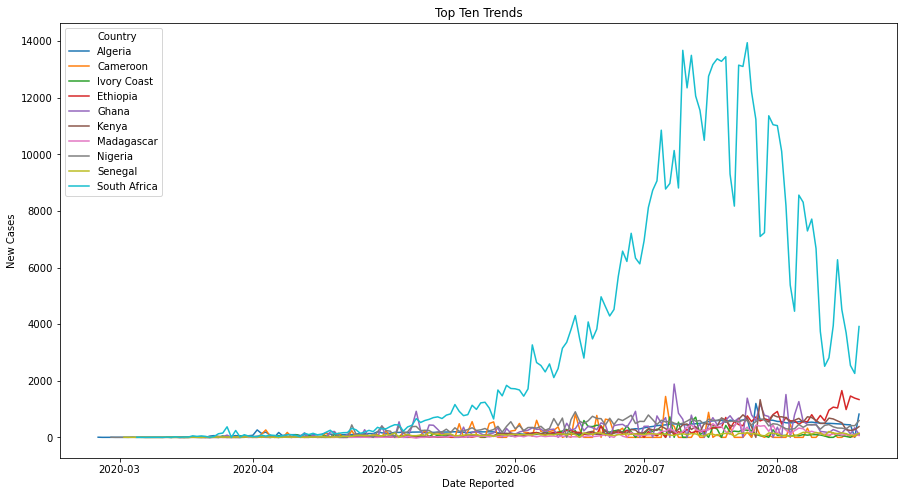

In [45]:
#top ten news cases time series
plt.figure(figsize=(15,8))
peak = sns.lineplot(x="Date_reported", y="New_cases",
             hue="Country",
             data=df_top10)
peak.set(xlabel='Date Reported', ylabel='New Cases')
peak.set_title('Top Ten Trends')

 Exclude South Africa

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Minus South Africa')

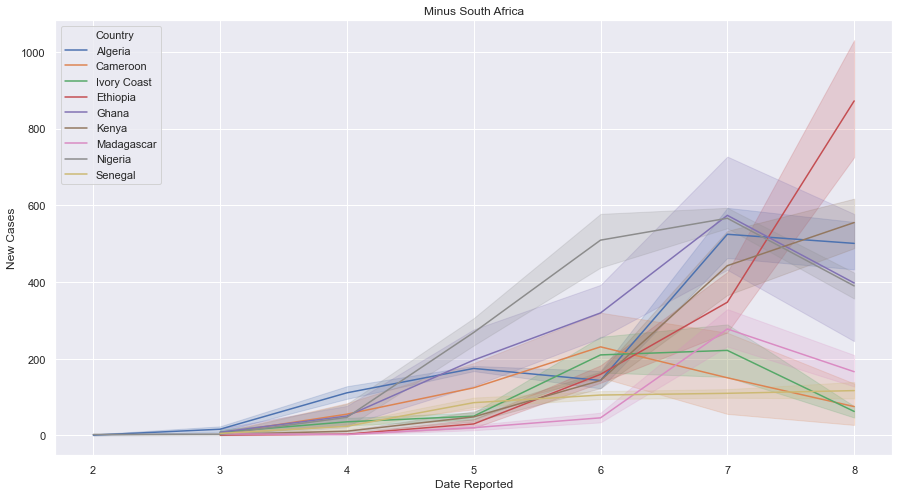

In [46]:
#Minus sa
sns.set(style="darkgrid")

minus_sa = df_top10[df.Country != 'South Africa']
plt.figure(figsize=(15,8))
peak = sns.lineplot(x="month", y="New_cases",
             hue="Country",
             data=minus_sa)
peak.set(xlabel='Date Reported', ylabel='New Cases')
peak.set_title('Minus South Africa')


Most contries seem to have picked - Except Ethiopia. Zoom into Ethiopia - 
Use date reported

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Ethiopia')

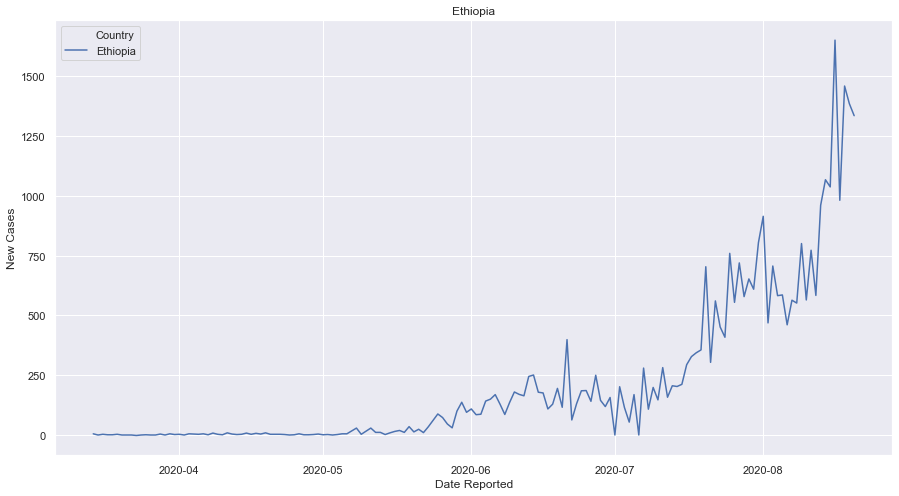

In [47]:
eth = df_top10[df.Country == 'Ethiopia']
plt.figure(figsize=(15,8))
peak = sns.lineplot(x="Date_reported", y="New_cases",
             hue="Country",
             data=eth)
peak.set(xlabel='Date Reported', ylabel='New Cases')
peak.set_title('Ethiopia')

Might have picked as well